In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from pprint import pprint
import os
import csv

In [2]:
#Import data from API's and merge
import urllib.parse

# Philly Arrests API URL
crime_url = "https://phl.carto.com/api/v2/sql?q=SELECT * FROM arrests_zipcode"

try:
    crime_data = requests.get(crime_url)
    
    crime_df = pd.DataFrame(crime_data.json()['rows'])
    
except Exception as e:
    print(e)

In [3]:
#print crime df for reference
crime_df

,cartodb_id,the_geom,the_geom_webmercator,offense_category,day,zip_code,defendant_race,count,objectid
0,1,None,None,Aggravated Assault,2011-02-20T05:00:00Z,19151,Black,1,26605042
1,2,None,None,Aggravated Assault,2011-02-21T05:00:00Z,19119,Black,1,26605043
2,3,None,None,Aggravated Assault,2011-02-21T05:00:00Z,19134,Latinx,1,26605044
3,4,None,None,Aggravated Assault,2011-02-21T05:00:00Z,19139,Black,1,26605045
4,5,None,None,Aggravated Assault,2011-02-21T05:00:00Z,19142,Black,1,26605046
...,...,...,...,...,...,...,...,...,...
377375,377376,None,None,Violation of Protection Order,2017-07-13T04:00:00Z,19119,Black,1,26979156
377376,377377,None,None,Violation of Protection Order,2017-07-13T04:00:00Z,19120,Latinx,1,26979157
377377,377378,None,None,Violation of Protection Order,2017-07-14T04:00:00Z,19120,Black,1,26979158
377378,377379,None,None,Violation of Protection Order,2017-07-14T04:00:00Z,19130,White,1,26979159


In [4]:
#Filter crime df to 2023 and zip code
philly_crime_23 = crime_df.loc[(crime_df['day'].str.startswith('2023'))&(crime_df['zip_code'] != 'Unknown'),'zip_code']

#Filter crime df to 2017 and zip code
philly_crime_17 = crime_df.loc[(crime_df['day'].str.startswith('2017'))&(crime_df['zip_code'] != 'Unknown'),'zip_code']

In [5]:
philly_crime_counts = pd.DataFrame(philly_crime_23.value_counts())
philly_crime_counts = philly_crime_counts.rename(columns={'zip_code':'offense_count'})
philly_crime_counts

,offense_count
19134,1274
19140,655
19124,578
19132,490
19133,471
19143,445
19139,440
19120,336
19121,329
19104,306


In [6]:
philly_crime_counts_2017 = pd.DataFrame(philly_crime_17.value_counts())
philly_crime_counts_2017 = philly_crime_counts_2017.rename(columns={'zip_code':'offense_count'})
philly_crime_counts_2017

,offense_count
19134,3407
19140,1749
19124,1734
19133,1590
19132,1242
19139,1214
19143,1101
19148,951
19120,948
19121,917


In [9]:
#Import Zillow CSV

csvpath = os.path.join('Notebooks/Resources/zillowzipcodedata.csv')
with open(csvpath) as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    zillowdf = pd.DataFrame(csvreader)

zillowdf

,0,1,2,3,4,5,6,7,8,9,...,281,282,283,284,285,286,287,288,289,290
0,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30
1,61148,0,08701,zip,NJ,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,130495.05402126053,...,522911.93858133693,525760.916963106,529585.5432720996,532686.3868802347,535392.39159072,537659.7099523315,541718.3693583619,547034.256791657,552740.334751418,557699.9148471738
2,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,223783.2633272636,...,489818.3843563635,488119.8232786911,486700.7429074319,484703.5506262178,482475.3787056757,481336.2020047993,482130.0236626993,484303.78532270854,486757.3267826783,489401.7675814103
3,91940,2,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,113663.9172501208,...,286215.81302992057,285608.5458682451,284607.911363155,283023.82716452336,281199.63363989844,279635.96650250006,278828.79627233226,278477.9276051008,278667.2519859292,279406.77055740874
4,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,98291.00869215206,...,436429.30818509357,433923.3496180228,433047.6668998769,431340.17177735927,431285.7080241184,432070.7889796404,434946.1341071965,436790.9085558492,440642.7600129069,447181.48804894934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27002,91942,39809,77451,zip,TX,TX,East Bernard,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,,...,166250.98179919182,165810.71303907954,165541.24519091597,164515.80960390455,164933.2357265507,165161.47059440878,165677.00063769481,164887.19633722692,164086.9869931056,162623.91065191268
27003,80861,39809,52163,zip,IA,IA,Protivin,,Howard County,,...,107610.30150468332,108264.60229721888,108715.07284105297,109019.77698125225,108857.28676876189,108175.54121966522,107477.65678695834,107308.78216000179,107901.33185644133,108517.80556238163
27004,69074,39809,26576,zip,WV,WV,Farmington,"Fairmont, WV",Marion County,,...,94238.81769904013,94143.95089306233,93801.26838910022,93869.42504615097,94206.49860940177,94922.58135798993,95646.24065005539,96298.55716375336,97296.61231375152,98022.23982647252
27005,64515,39809,16245,zip,PA,PA,Oak Ridge,"Pittsburgh, PA",Armstrong County,,...,80320.99678571308,79479.32021570177,78285.29051357572,77684.35008576482,77929.35182622983,77798.82577849952,76858.03109879245,75709.91993530591,75751.93531498652,76474.63760178066


In [10]:
fullphillyzillow = zillowdf.loc[(zillowdf[6] == 'Philadelphia')&(zillowdf[5] == 'PA'),2:]
fullphillyzillow = fullphillyzillow.rename(columns={2:'zip_code'})
fullphillyzillow = fullphillyzillow.set_index('zip_code')
fullphillyzillow = fullphillyzillow.loc[:,np.arange(153,226,12)]

# this is the final timepoint
phillyzillow = zillowdf.loc[(zillowdf[6] == 'Philadelphia')&(zillowdf[5] == 'PA'),(2,290)]
phillyzillow = phillyzillow.rename(columns={2:'zip_code',290:'ZHVI'})
phillyzillow = phillyzillow.set_index('zip_code')

phillyzillow

,ZHVI
zip_code,
19120,157079.99056692256
19124,155755.513047764
19111,279611.3807600301
19143,127886.75033201296
19149,220640.6397306033
19134,102127.55170587571
19140,80905.3843383473
19104,215241.11710614603
19148,251917.63273992765


In [11]:
# this is the final timepoint
phillyzillow_17 = zillowdf.loc[(zillowdf[6] == 'Philadelphia')&(zillowdf[5] == 'PA'),(2,218)]
phillyzillow_17= phillyzillow_17.rename(columns={2:'zip_code',218:'ZHVI'})
phillyzillow_17= phillyzillow_17.set_index('zip_code')

phillyzillow_17

,ZHVI
zip_code,
19120,92466.57482392092
19124,88583.56695639144
19111,172496.41984348017
19143,61825.71092092951
19149,138893.81118912424
19134,55964.05669842302
19140,31061.374032785738
19104,128216.16054616762
19148,187825.84848371614


In [13]:
#Merged and Cleaned Philly data

philly_combined_current = pd.merge(philly_crime_counts,phillyzillow,how='left', right_on = 'zip_code',left_index=True)
philly_combined_current = philly_combined_current.dropna()
philly_combined_current

,zip_code,offense_count,ZHVI
19134,19134,1274,102127.55170587571
19140,19140,655,80905.3843383473
19124,19124,578,155755.513047764
19132,19132,490,69020.88959923598
19133,19133,471,66578.0433609949
19143,19143,445,127886.75033201296
19139,19139,440,117185.50579333893
19120,19120,336,157079.99056692256
19121,19121,329,190426.19388412157
19104,19104,306,215241.11710614603


In [14]:
philly_combined_past = pd.merge(philly_crime_counts_2017,phillyzillow_17,how='left', right_on = 'zip_code',left_index=True)
philly_combined_past = philly_combined_past.dropna()
philly_combined_past

,zip_code,offense_count,ZHVI
19134,19134,3407,55964.05669842302
19140,19140,1749,31061.374032785738
19124,19124,1734,88583.56695639144
19133,19133,1590,24872.870184830437
19132,19132,1242,20331.1859525795
19139,19139,1214,52778.48066226794
19143,19143,1101,61825.71092092951
19148,19148,951,187825.84848371614
19120,19120,948,92466.57482392092
19121,19121,917,77060.88089272377


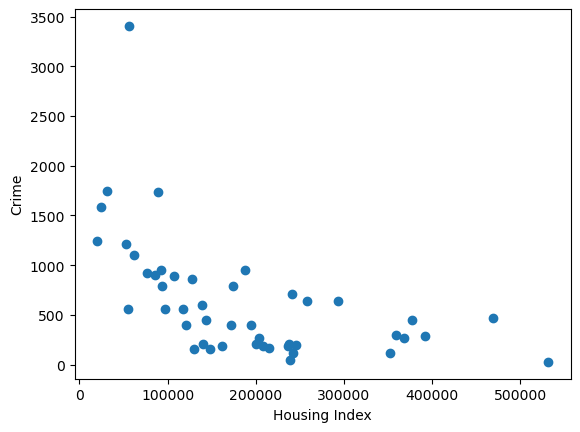

In [19]:
#Scatter plot displaying Crime vs. Price Earlier Year

#Setting to lists
housing_earlier = list(philly_combined_past['ZHVI'].astype(float))
crime_earlier = list(philly_combined_past['offense_count'])

#Regression
# d_slope, d_int, d_r, d_p, d_std_err = st.linregress(housing_earlier, crime_earlier)
# housing_earlier_array = np.asarray(housing_earlier)
# d_fit = np.multiply(housing_earlier_array, d_slope) + d_int

#Plot 2017 data
plt.scatter(housing_earlier,crime_earlier)
# plt.plot(ZHVI, d_fit,"--")
plt.xlabel('Housing Index')
plt.ylabel('Crime')
plt.show()

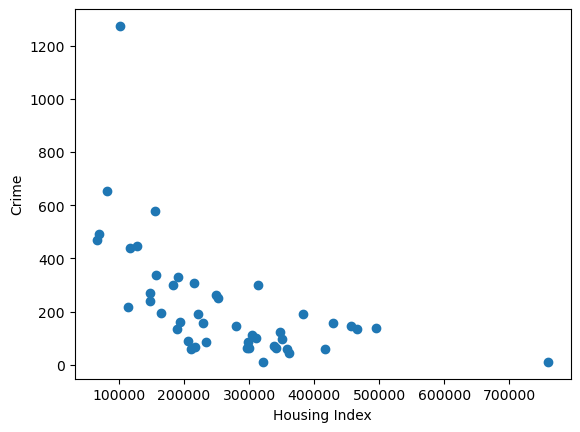

In [20]:
#Scatter plot displaying Crime vs. Price Later Year

#Setting to lists
housing_later = list(philly_combined_current['ZHVI'].astype(float))
crime_later = list(philly_combined_current['offense_count'])

#Regression
# d_slope, d_int, d_r, d_p, d_std_err = st.linregress(housing_later, crime_later)
# housing_later_array = np.asarray(housing_later)
# d_fit = np.multiply(housing_later_array, d_slope) + d_int

#Plot 2023 data
plt.scatter(housing_later,crime_later)
# plt.plot(housing_later, d_fit,"--")
plt.xlabel('Housing Index')
plt.ylabel('Crime')
plt.show()